<a href="https://colab.research.google.com/github/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/blob/main/Model3_distilBert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Member:

**Name:** Junle Zhou  
**zID:** z5431301

# Model 3: distilBert

This notebook demonstrates the application of the DistilBERT model for natural language processing (NLP) tasks, focusing on both pre-trained and customized versions of the model. It includes the following contents:

1. 🤗 **Pre-trained DistilBERT Model**:
    - Leverages a pre-trained DistilBERT model for initial text processing and sentiment analysis.
    - Applies the model to both the original and relabeled datasets, showcasing its performance in handling sentiment classification tasks.

2. 🔧 **Customized DistilBERT Model**:
    - Implements a fine-tuned version of the DistilBERT model, tailored for improved performance on specific sentiment analysis tasks.
    - Explores various customization techniques, including selective layer freezing and dropout adjustments, to enhance the model's accuracy and generalization capabilities.

This notebook provides a comprehensive overview of how to effectively utilize both pre-trained and customized DistilBERT models for NLP tasks, with a particular focus on sentiment analysis.


# 1.🤗 Pretrained DistilBERT Model - Trainer from transformer:

In [ ]:
!pip install transformers[torch]
!pip install accelerate
!pip install datasets

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

url = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti.csv'
url_A = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-A.csv'
url_B = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-B.csv'
url_C = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-C.csv'

original_df = pd.read_csv(url)
original_df_A = pd.read_csv(url_A)
original_df_B = pd.read_csv(url_B)
original_df_C = pd.read_csv(url_C)
# Preparing / Initialization for preprocessed dataset
df = pd.read_csv(url)
df_A = pd.read_csv(url_A)
df_B = pd.read_csv(url_B)
df_C = pd.read_csv(url_C)

def text_preprocessing(s):
    """
    - Change "'t" to "not"
    - Remove urls
    - Isolate and remove punctuations except "?" and "!"
    - Remove other special characters and unwanted patterns
    - Remove stop words except "not" and "can"
    - Remove trailing whitespace
    """

    # Change 't to 'not'
    s = re.sub(r"\'t", " not", s)
    # Remove urls
    s = re.sub(r'https?://\S+|www\.\S+', '', s)
    # Remove special characters and unwanted patterns
    s = re.sub("‚äô", "", s)
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    s = re.sub(r'(#.*?)[\s]', ' ', s)
    s = re.sub(r'&amp;', '&', s)
    s = re.sub(r'[^?!a-zA-Z0-9\s]', ' ', s)
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()

    return s
df['tweet'] = df['tweet'].apply(text_preprocessing)
label_mapping = {
  'neg': 0,
  'neu': 1,
  'pos': 2
}

df['label'] = df['label'].map(label_mapping)
df_A['label'] = df_A['label'].map(label_mapping)
df_B['label'] = df_B['label'].map(label_mapping)
df_C['label'] = df_C['label'].map(label_mapping)
df.sample(10)


,tweet,label
70217,Salesforce asks employees in California to wor...,0
27093,What is Coronavirus? How it spreads? Symptoms ...,1
53443,Coronavirus latest President Trump pushes Fed ...,2
14328,Did a bit of NPR yesterday Coronavirus Scare S...,1
87678,20PCS KN95 Folding Valved Dust Mask PM2 5 Anti...,1
13670,Stocks cut gains on more coronavirus fears Dow...,2
76941,5 gone Gonna have to start washing my hands so...,1
73498,The BATZ are selling like !here s beautiful ba...,2
21142,Some Asian buyers are asking for less Saudi cr...,0
70542,You could ve come here but Buckie s got Corona...,0


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

new_url_A = 'https://raw.githubusercontent.com/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/main/New-COVIDSenti_A.csv'

new_df_A = pd.read_csv(new_url_A)
new_df_A['tweet'] = new_df_A['tweet'].fillna("")
new_df_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   30000 non-null  object
 1   label   30000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.9+ KB


In [ ]:
from transformers import AutoTokenizer
checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
def tokenize_function(batch):
  return tokenizer(batch["tweet"], padding = True, truncation = True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

### 1.1 DistilBert on original dataset

In [ ]:
import random
def set_seed(seed_value=42):
    """Set seed for reproducibility."""
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

In [ ]:
from sklearn.model_selection import train_test_split
original_df_train, remaining_df = train_test_split(df, test_size=0.20, random_state=42)
original_df_validation, original_df_test = train_test_split(remaining_df, test_size=0.50, random_state=42)
original_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72000 entries, 51004 to 15795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   72000 non-null  object
 1   label   72000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [ ]:
from datasets import Dataset
full_train = Dataset.from_pandas(original_df_train)
full_validation = Dataset.from_pandas(original_df_validation)
full_test = Dataset.from_pandas(original_df_test)

# Now `dataset` can be used similarly to how we'd use datasets in Hugging Face's ecosystem
print(full_train)
full_train[:5]

Dataset({
    features: ['tweet', 'label', '__index_level_0__'],
    num_rows: 72000
})


{'tweet': ['Coronavirus No New Case in Nigeria Health Minister',
  'Live Coronavirus Total Confirmed Cases Around the World Map Tracker information Streaming on below link',
  'WHO Declares Global Health Emergency as Wuhan Coronavirus Continues To Spread Th',
  'Trump s Budget Director Responds to Misinformation Over Coronavirus Funding Cuts',
  'Chinese foreign minister attends Munich Security Conference amid coronavirus outbreak'],
 'label': [0, 1, 1, 1, 0],
 '__index_level_0__': [51004, 11453, 9691, 51992, 23531]}

In [ ]:
full_train_tokenized = full_train.map(tokenize_function,
                    batched = True,
                    batch_size = None)
full_validation_tokenized = full_validation.map(tokenize_function,
                    batched = True,
                    batch_size = None)
full_test_tokenized = full_test.map(tokenize_function,
                    batched = True,
                    batch_size = None)

Map:   0%|          | 0/72000 [00:00<?, ? examples/s]

Map:   0%|          | 0/9000 [00:00<?, ? examples/s]

Map:   0%|          | 0/9000 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification
import torch

checkpoint = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = (AutoModelForSequenceClassification.from_pretrained(checkpoint,
                              num_labels = 3).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds=pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy":acc, "f1": f1}

In [ ]:
from transformers import TrainingArguments
training_args = TrainingArguments(
  output_dir = "finetuning-COVIDSenti-distilbert-model",
  num_train_epochs=10,
  learning_rate=5e-5,
  per_device_eval_batch_size=16,
  per_device_train_batch_size=16,
  weight_decay=0.01,
  eval_strategy="epoch",
  save_strategy="epoch",
  disable_tqdm=False,
  push_to_hub=True,
  load_best_model_at_end=True
)

In [ ]:
from transformers import Trainer, EarlyStoppingCallback

trainer = Trainer(
  model = model,
  args = training_args,
  compute_metrics = compute_metrics,
  train_dataset = full_train_tokenized,
  eval_dataset = full_validation_tokenized,
  tokenizer = tokenizer,
  callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

In [ ]:
%%time
set_seed(42)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.167400,0.175123,0.942778,0.941169
2,0.127200,0.134345,0.963556,0.963461
3,0.088700,0.137273,0.967444,0.967471


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.167400,0.175123,0.942778,0.941169
2,0.127200,0.134345,0.963556,0.963461
3,0.088700,0.137273,0.967444,0.967471
4,0.059900,0.175673,0.964222,0.964183


In [ ]:
# Evaluate the model on the test dataset
test_results = trainer.evaluate(full_test_tokenized)

In [ ]:
test_results

{'eval_loss': 0.15027903020381927,
 'eval_accuracy': 0.9616666666666667,
 'eval_f1': 0.961445162376784,
 'eval_runtime': 5.4165,
 'eval_samples_per_second': 1661.594,
 'eval_steps_per_second': 103.942,
 'epoch': 5.0}

### 1.2 DistilBert on the new dataset

In [ ]:
from sklearn.model_selection import train_test_split
new_df_train, remaining_df = train_test_split(new_df_A, test_size=0.20, random_state=42)
new_df_validation, new_df_test = train_test_split(remaining_df, test_size=0.50, random_state=42)

In [ ]:
from datasets import Dataset
full_train = Dataset.from_pandas(new_df_train)
full_validation = Dataset.from_pandas(new_df_validation)
full_test = Dataset.from_pandas(new_df_test)

# Now `dataset` can be used similarly to how we'd use datasets in Hugging Face's ecosystem
print(full_train)
full_train[:5]

Dataset({
    features: ['tweet', 'label', '__index_level_0__'],
    num_rows: 24000
})


{'tweet': ['CNET reporting has been cancelled this year due to rising coronavirus fears',
  'shoutout to all the racist grandparents who told their grandkids today to stay away from chinese people because of the coronavirus',
  'Woman daughters quarantined in California due to coronavirus doing well',
  'Update on',
  'TEDAV S BULUNDU! Coronavirus China Doctor Li Wenliang DIED China Wuh'],
 'label': [0, 0, 2, 1, 1],
 '__index_level_0__': [21753, 251, 22941, 618, 17090]}

In [ ]:
full_train_tokenized = full_train.map(tokenize_function,
                    batched = True,
                    batch_size = None)
full_validation_tokenized = full_validation.map(tokenize_function,
                    batched = True,
                    batch_size = None)
full_test_tokenized = full_test.map(tokenize_function,
                    batched = True,
                    batch_size = None)

Map:   0%|          | 0/24000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification
import torch

checkpoint = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = (AutoModelForSequenceClassification.from_pretrained(checkpoint,
                              num_labels = 3).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds=pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy":acc, "f1": f1}

In [ ]:
from transformers import TrainingArguments
training_args = TrainingArguments(
  output_dir = "finetuning-COVIDSenti-distilbert-model",
  num_train_epochs=10,
  learning_rate=5e-6,
  per_device_eval_batch_size=64,
  per_device_train_batch_size=64,
  weight_decay=0.01,
  eval_strategy="epoch",
  save_strategy="epoch",
  disable_tqdm=False,
  push_to_hub=True,
  load_best_model_at_end=True
)

In [ ]:
from transformers import Trainer, EarlyStoppingCallback

trainer = Trainer(
  model = model,
  args = training_args,
  compute_metrics = compute_metrics,
  train_dataset = full_train_tokenized,
  eval_dataset = full_validation_tokenized,
  tokenizer = tokenizer,
  callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.566879,0.767333,0.746195
2,0.666700,0.519007,0.786333,0.776834
3,0.516100,0.498905,0.799333,0.791764
4,0.462600,0.494063,0.802000,0.795663
5,0.462600,0.494414,0.793333,0.793023
6,0.433600,0.487678,0.803000,0.800183
7,0.400900,0.494502,0.799000,0.798104
8,0.383300,0.491375,0.805000,0.802475
9,0.383300,0.492885,0.805000,0.802633


TrainOutput(global_step=3375, training_loss=0.4655439091435185, metrics={'train_runtime': 256.1037, 'train_samples_per_second': 937.12, 'train_steps_per_second': 14.643, 'total_flos': 2626626980304000.0, 'train_loss': 0.4655439091435185, 'epoch': 9.0})

In [ ]:
# Evaluate the model on the test dataset
test_results = trainer.evaluate(full_test_tokenized)
test_results

{'eval_loss': 0.49107950925827026,
 'eval_accuracy': 0.8066666666666666,
 'eval_f1': 0.8038978752449042,
 'eval_runtime': 1.0196,
 'eval_samples_per_second': 2942.203,
 'eval_steps_per_second': 46.095,
 'epoch': 9.0}

# 2.🔧Customized DistilBERT Model
We've experimented various customized distilBERT models, here we will show the one that get us the best result.

## 2.1.1 Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# URLs for datasets
urls = {
    'original': 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti.csv',
    'A': 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-A.csv',
    'B': 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-B.csv',
    'C': 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-C.csv'
}

# Load datasets
data = pd.read_csv(urls['original'])
df_A = pd.read_csv(urls['A'])
df_B = pd.read_csv(urls['B'])
df_C = pd.read_csv(urls['C'])

# Apply cleaning function to all datasets
datasets = [data, df_A, df_B, df_C]

# Map labels
label_mapping = {
    'neg': 0,
    'neu': 1,
    'pos': 2
}

for df in datasets:
    df['label'] = df['label'].map(label_mapping)

# Sample and print 10 tweets from the original dataset
for i in range(10):
  print(data.iloc[i, 0], data.iloc[i, 1])
data.info()

Coronavirus | Human Coronavirus Types | CDC https://t.co/IxoxVRarIb 1
@shehryar_taseer That‚Äôs üíØ true , 
Corona virus 
swine flue 
Bird flu in December when whole Pk is busy in Marriage‚Ä¶ https://t.co/6JWBIymnyo 1
TLDR: Not SARS, possibly new coronavirus. Difficult to confirm because patients identified later in infection when‚Ä¶ https://t.co/utKo0fxdgX 0
Disease outbreak news from the WHO: Middle East respiratory syndrome coronavirus (MERS-CoV) ‚Äì The United Arab Emira‚Ä¶ https://t.co/n89E94ZILj 1
China - Media: WSJ says sources tell them mystery pneumonia is a new coronavirus - something that has been speculat‚Ä¶ https://t.co/3pJMDuiazw 1
The mystery new virus causing #China pneumonia outbreak is possibly new coronavirus (same family as #sars and #mers‚Ä¶ https://t.co/8OyBQC886H 1
Virologists weigh in on novel coronavirus in China's outbreak https://t.co/0nx4niHATT 1
"Chinese authorities have made a preliminary determination of a novel (or new) #coronavirus, identified in a hos

In [ ]:
from sklearn.model_selection import train_test_split

X = data.tweet.values
y = data.label.values

X_train, X_temp, y_train, y_temp =\
    train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test =\
    train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X[:10])
print(y[:10])

['Coronavirus | Human Coronavirus Types | CDC https://t.co/IxoxVRarIb'
 '@shehryar_taseer That‚Äôs \uf8ffüíØ true , \nCorona virus \nswine flue \nBird flu in December when whole Pk is busy in Marriage‚Ä¶ https://t.co/6JWBIymnyo'
 'TLDR: Not SARS, possibly new coronavirus. Difficult to confirm because patients identified later in infection when‚Ä¶ https://t.co/utKo0fxdgX'
 'Disease outbreak news from the WHO: Middle East respiratory syndrome coronavirus (MERS-CoV) ‚Äì The United Arab Emira‚Ä¶ https://t.co/n89E94ZILj'
 'China - Media: WSJ says sources tell them mystery pneumonia is a new coronavirus - something that has been speculat‚Ä¶ https://t.co/3pJMDuiazw'
 'The mystery new virus causing #China pneumonia outbreak is possibly new coronavirus (same family as #sars and #mers‚Ä¶ https://t.co/8OyBQC886H'
 "Virologists weigh in on novel coronavirus in China's outbreak https://t.co/0nx4niHATT"
 '"Chinese authorities have made a preliminary determination of a novel (or new) #coronavirus, id

## 2.1.2 Setup Cuda

In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: NVIDIA A100-SXM4-40GB


In [ ]:

def text_preprocessing(s):
    """
    - Lowercase the sentence
    - Change "'t" to "not"
    - Remove "@name"
    - Isolate and remove punctuations except "?"
    - Remove other special characters
    - Remove trailing whitespace
    """

    # Change 't to 'not'
    s = re.sub(r"\'t", " not", s)
    # Remove @name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Remove urls
    s = re.sub(r'https?://\S+|www\.\S+', '', s)
    # Remove special characters and unwanted patterns
    s = re.sub("‚äô", "", s)
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    s = re.sub(r'(#.*?)[\s]', ' ', s)
    s = re.sub(r'&amp;', '&', s)
    s = re.sub(r'[^?!a-zA-Z0-9\s]', ' ', s)
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()

    return s

### 2.1 distilBERT Tokenizer

To utilize the pre-trained distilBert model, we must employ the tokenizer provided by the library. This necessity arises because:

1. The model operates with a specific, fixed vocabulary.
2. The distilBert tokenizer has a unique method for handling out-of-vocabulary words.

Additionally, we need to:
- Add special tokens to the beginning and end of each sentence.
- Pad and truncate all sentences to a uniform length.
- Explicitly specify padding tokens using the "attention mask."

The `encode_plus` method of the distilBert tokenizer performs several functions:
1. Splits the text into tokens.
2. Adds special [CLS] and [SEP] tokens.
3. Converts these tokens into indexes from the tokenizer's vocabulary.
4. Pads or truncates sentences to the maximum length.
5. Creates an attention mask.


In [ ]:
import torch
from transformers import DistilBertTokenizer

# Load the DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)

# Create a function to tokenize a set of texts for DistilBERT
def preprocessing_for_distilbert(data):
    """Perform required preprocessing steps for pretrained DistilBERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=text_preprocessing(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,             # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            return_attention_mask=True,     # Return attention mask
            truncation=True
        )

        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
# All tweets
all_tweets = data.tweet.values

# Encode our data
encoded_tweets = [tokenizer.encode(sent, add_special_tokens=True) for sent in all_tweets]

# Find the maximum length
max_len = max([len(sent) for sent in encoded_tweets])
print('Max length: ', max_len)

Max length:  193


In [ ]:
# Specify `MAX_LEN`
MAX_LEN = 192

# Print sentence 0 and its encoded token ids
token_ids = list(preprocessing_for_distilbert([X[0]])[0].squeeze().numpy())
print('Original: ', X[0])
print('Token IDs: ', token_ids)

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_distilbert(X_train)
val_inputs, val_masks = preprocessing_for_distilbert(X_val)
test_inputs, test_masks = preprocessing_for_distilbert(X_test)

Original:  Coronavirus | Human Coronavirus Types | CDC https://t.co/IxoxVRarIb
Token IDs:  [101, 21887, 23350, 2529, 21887, 23350, 4127, 26629, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Tokenizing data...


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2760: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


### 2.2 Create Pytorch DataLoader

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)
test_labels = torch.tensor(y_test)

batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

### 2.3 Training

#### 2.3.1 Create DistilBertClassifier
Below we will create a DistilBertClassifier class with a BERT model to extract the last hidden layer of the [CLS] token and a single-hidden-layer feed-forward neural network as our classifier.

In [ ]:
import torch
import torch.nn as nn
from transformers import DistilBertModel

# Create the DistilBertClassifier class with Dropout
class DistilBertClassifier(nn.Module):
    """DistilBERT Model for Classification Tasks with Dropout.
    """
    def __init__(self, freeze_layers=0, dropout_prob=0.5):
        """
        @param    freeze_layers (int): Number of transformer layers to freeze (0 to 6)
        @param    dropout_prob (float): Dropout probability
        """
        super(DistilBertClassifier, self).__init__()
        # Specify hidden size of DistilBERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 64, 3

        # Instantiate DistilBERT model
        self.bert = DistilBertModel.from_pretrained('distilbert-base-uncased')

        # Dropout layer after DistilBERT output
        self.dropout = nn.Dropout(dropout_prob)

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(H, D_out)
        )

        # Freeze the first `freeze_layers` layers of the DistilBERT model
        if freeze_layers > 0:
            # Get the list of layers in DistilBERT
            for i, layer in enumerate(self.bert.transformer.layer):
                if i < freeze_layers:
                    for param in layer.parameters():
                        param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        """
        Feed input to DistilBERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to DistilBERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)

        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs.last_hidden_state[:, 0, :]

        # Apply dropout
        dropout_output = self.dropout(last_hidden_state_cls)

        # Feed input to classifier to compute logits
        logits = self.classifier(dropout_output)

        return logits



#### 2.3.2. Optimizer & Learning Rate Scheduler

In [ ]:
from transformers import get_linear_schedule_with_warmup
import torch.optim
def initialize_model(epochs=10):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    # Here is where we specify the layers we freeze and the dropout probability
    distilbert_classifier = DistilBertClassifier(freeze_layers=2, dropout_prob=0.5)

    # Tell PyTorch to run the model on GPU
    distilbert_classifier.to(device)

    # Create the optimizer
    optimizer = torch.optim.AdamW(distilbert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return distilbert_classifier, optimizer, scheduler

#### 2.3.3 Training and evaluating

In [ ]:
import random
import time
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility."""
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=10, evaluation=False, patience=3):
    """Train the BertClassifier model and keep track of training/validation loss and accuracy."""
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    best_val_loss = float('inf')
    patience_counter = 0

    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0
        correct_predictions = 0
        total_predictions = 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts += 1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Get the predictions
            preds = torch.argmax(logits, dim=1).flatten()
            correct_predictions += (preds == b_labels).cpu().numpy().sum()
            total_predictions += b_labels.size(0)

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss and accuracy over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)
        train_losses.append(avg_train_loss)

        train_accuracy = correct_predictions / total_predictions
        train_accuracies.append(train_accuracy)

        print(f"Training Accuracy for Epoch {epoch_i + 1}: {train_accuracy:.2f}")

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)
            val_accuracy = val_accuracy / 100
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time.time() - t0_epoch:^9.2f}")
            print("-"*70)

            # Check if the validation loss improved
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
                # Save the best model
                torch.save(model.state_dict(), 'best_model.pt')
                print("Best model saved!")
            else:
                patience_counter += 1

            # Early stopping
            if patience_counter >= patience:
                print("Early stopping triggered")
                break

        print("\n")

    print("Training complete!")
    return train_losses, val_losses, train_accuracies, val_accuracies

def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set."""
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy


In [ ]:
# Training the model and capturing the losses and accuracies
set_seed(42)    # Set seed for reproducibility

distilbert_classifier, optimizer, scheduler = initialize_model(epochs=10)
train_losses, val_losses, train_accuracies, val_accuracies = train(distilbert_classifier, train_dataloader, val_dataloader, epochs=10, evaluation=True)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.919781   |     -      |     -     |   3.95   
   1    |   40    |   0.800811   |     -      |     -     |   2.18   
   1    |   60    |   0.718840   |     -      |     -     |   2.19   
   1    |   80    |   0.745019   |     -      |     -     |   2.18   
   1    |   100   |   0.734710   |     -      |     -     |   2.18   
   1    |   120   |   0.670848   |     -      |     -     |   2.18   
   1    |   140   |   0.689682   |     -      |     -     |   2.18   
   1    |   160   |   0.586547   |     -      |     -     |   2.19   
   1    |   180   |   0.637332   |     -      |     -     |   2.19   
   1    |   200   |   0.611464   |     -      |     -     |   2.19   
   1    |   220   |   0.528102   |     -      |     -     |   2.18   
   1    |   240   |   0.571266   |     -      |     -     |   2.18   


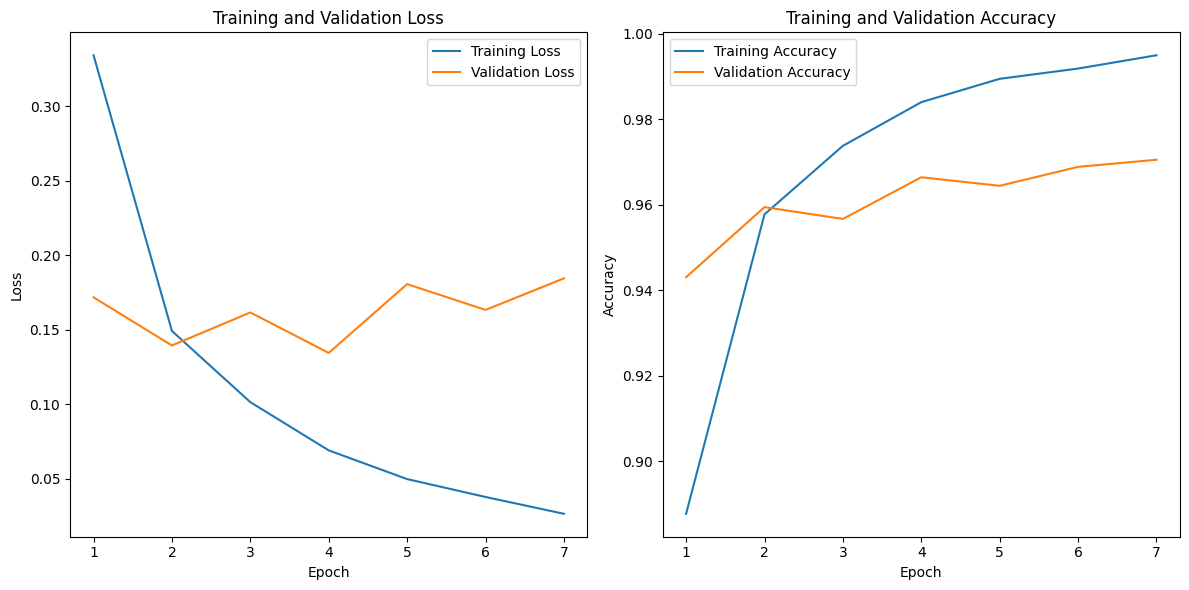

In [ ]:
epochs = range(1, len(train_losses) + 1)
# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.xticks(epochs)

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.xticks(epochs)

plt.tight_layout()
plt.show()


In [ ]:
import torch.nn.functional as F
from sklearn.metrics import f1_score, accuracy_score

def distilbert_predict(model, test_dataloader):
    """Perform a forward pass on the trained DistilBERT model to predict probabilities
    on the test set, and calculate F1 scores and accuracy.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []
    all_labels = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)
        all_labels.append(b_labels)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)

    # Concatenate logits and labels from each batch
    all_logits = torch.cat(all_logits, dim=0)
    all_labels = torch.cat(all_labels, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    # Get the predicted labels
    preds = np.argmax(probs, axis=1)

    # Calculate F1 score
    f1 = f1_score(all_labels.cpu().numpy(), preds, average='weighted')

    # Calculate accuracy
    accuracy = accuracy_score(all_labels.cpu().numpy(), preds)

    return f1, probs, accuracy




In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(probs, y_true):
    """
    - Print accuracy and F1 score on the test set
    - Plot confusion matrix
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), num_classes)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    # Get the predicted class with the highest probability
    y_pred = np.argmax(probs, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')

    # Calculate F1 score for each class and their average
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f'Weighted F1 Score: {f1:.4f}')

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.tight_layout()
    plt.show()


In [ ]:
def load_best_model(model_path='best_model.pt', freeze_layers=0):
    model = DistilBertClassifier(freeze_layers=2, dropout_prob=0.5)
    model.load_state_dict(torch.load(model_path))
    model.to(device)
    return model

# Load the best model
best_model = load_best_model('best_model.pt', freeze_layers=2)

F1 Score: 0.9708345584633965
Accuracy: 0.9707777777777777
Accuracy: 97.08%
Weighted F1 Score: 0.9708


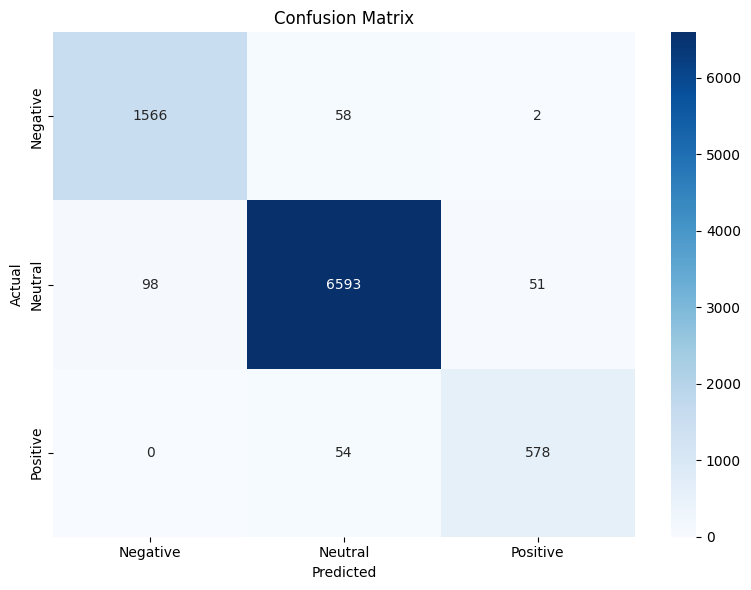

In [ ]:
# Evaluation
f1, probs, accuracy = distilbert_predict(distilbert_classifier, test_dataloader)
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
evaluate_model(probs, y_val)

# 3.Experiments and Results
| Experiment | Dataset  | Activation Function | Stop Words | Learning Rate | Batch Size | Hidden Architecture          | Freeze Transformer Layers | Dropout | Accuracy  |
|------------|----------|---------------------|------------|---------------|------------|------------------------------|---------------------------|---------|-----------|
| 1          | original | ReLU                | Remove     | 0.0002        | 64         | 1 layer; 64 units            | 0                         | 0.1     | 92.28%    |
| 2          | original | ReLU                | Keep       | 0.0002        | 64         | 1 layer; 64 units            | 0                         | 0.1     | 96.29%    |
| 3          | original | ReLU                | Keep       | 0.0005        | 64         | 1 layer; 64 units            | 0                         | 0.1     | 96.31%    |
| 4          | original | ReLU                | Keep       | 0.0005        | 32         | 1 layer; 64 units            | 0                         | 0.1     | 96.65%    |
| 5          | original | ReLU                | Keep       | 0.0005        | 16         | 1 layer; 64 units            | 0                         | 0.1     | 96.14%    |
| 6          | original | ReLU                | Keep       | 0.0005        | 32         | 1 layer; 64 units            | 6                         | 0       | 92.23%    |
| 7          | original | ReLU                | Keep       | 0.0005        | 32         | 1 layer; 64 units            | 4                         | 0       | 95.70%    |
| 8          | original | ReLU                | Keep       | 0.0005        | 32         | 1 layer; 64 units            | 2                         | 0       | 96.86%    |
| 9          | original | GELU                | Keep       | 0.0005        | 32         | 1 layer; 64 units            | 2                         | 0       | 96.58%    |
| 10         | original | ReLU                | Keep       | 0.0005        | 32         | 1 layer; 128 units           | 2                         | 0       | 96.44%    |
| 11         | original | ReLU                | Keep       | 0.0005        | 32         | 1 layer; 32 units            | 2                         | 0       | 96.61%    |
| 12         | original | ReLU                | Keep       | 0.0005        | 32         | 2 layers; 128 & 64 units     | 2                         | 0       | 96.53%    |
| 13         | original | ReLU                | Keep       | 0.0005        | 32         | 2 layers; 64 & 32 units      | 2                         | 0       | 96.76%    |
| 14         | original | ReLU                | Keep       | 0.0005        | 32         | Conv1D                       | 2                         | 0       | 96.29%    |
| 15         | original | ReLU                | Keep       | 0.0005        | 32         | Conv2D                       | 2                         | 0       | 96.44%    |
| 16         | original | ReLU                | Keep       | 0.0005        | 32         | 0 hidden layer               | 2                         | 0       | 96.61%    |
| 17         | original | ReLU                | Keep       | 0.0005        | 32         | 1 layer; 64 units            | 2                         | 0.3     | 96.84%    |
| 18         | original | ReLU                | Keep       | 0.0005        | 32         | 1 layer; 64 units            | 2                         | 0.5     | 97.08%    |
| 19         | new      | ReLU                | Keep       | 0.0005        | 32         | 1 layer; 64 units            | 2                         | 0.1     | 80.50%    |
| 20         | new      | ReLU                | Keep       | 0.0005        | 32         | 1 layer; 64 units            | 2                         | 0.5     | 81.53%    |




# 4.Discussion

Based on the above experiments, we observed and analyzed the following key points about DistilBERT:

1. Maintains High Performance with Simplified Architectures

  DistilBERT consistently demonstrated high accuracy, particularly when using simpler architectures. Unlike some models that require complex modifications to achieve peak performance, DistilBERT performed exceptionally well even with a single hidden layer and minimal transformations. This suggests that its pre-trained transformer layers effectively capture the nuances of sentiment in text without the need for overly complex structures.

2. Significance of Retaining Stop Words

  Experiments revealed that keeping stop words during preprocessing led to a significant improvement in accuracy. The presence of stop words preserves the natural structure and contextual integrity of the text, allowing DistilBERT's attention mechanisms to better capture sentiment nuances. This highlights the model's sensitivity to subtle textual elements, which are essential for accurate sentiment analysis.

3. Impact of Layer Freezing

  Selective freezing of transformer layers proved beneficial for fine-tuning. Freezing two transformer layers resulted in the highest accuracy observed across our experiments. This approach likely prevented overfitting by limiting the number of trainable parameters while still allowing the model to adapt to the specific sentiment analysis task.

4. Dropout Rate Enhances Generalization

  Introducing a dropout rate of 0.5 significantly improved the model's performance, achieving the highest accuracy of 97.08%. This indicates that applying an appropriate dropout rate helps in balancing the trade-off between model complexity and overfitting, leading to better generalization on unseen data.

5. Challenges with the Re-labeled Dataset

  Despite the high accuracy on the original dataset, the model's performance dropped on the re-labeled dataset. This decline suggests that the re-labeled dataset captured more nuanced and complex sentiments, which were harder for the model to learn. While DistilBERT is effective, the model struggled with these subtle distinctions, highlighting the challenge of accurately modeling more intricate sentiment expressions.

Overall, DistilBERT exhibited strong performance across a range of configurations, with notable strengths in handling simpler architectures and benefiting from careful preprocessing decisions. However, the complexity of sentiment nuances in the re-labeled dataset posed a challenge, indicating areas where further fine-tuning and dataset quality improvements might be necessary.
    

